# PIPELINE FOR EVALUATION OF COVERAGE IN CLINICAL PANELS AS QUALITY CONTOL ALIGMENT



## Autors 

***Jennifer Vélez Segura***
Lic. Biología. Msc(C) Bioinformatics U. Nacional
Centro de Investigación en Genética Humana y Reproductiva GENETIX
Calle 77 No 11 - 19 Cons 605 Bogotá -  Colombia
Tel: 312 02 00
www.genetix.com.co



***Claudia Serrano Serrano, M.D. MSc***
Scientific and General Direction
Centro de Investigación en Genética Humana y Reproductiva GENETIX
Calle 77 No 11 - 19 Cons 605 Bogotá -  Colombia
Tel: 312 02 00
www.genetix.com.co


## Introduction  

One of the technologies most used in the diagnosis of genetic diseases is the WES, which is the high-throughput sequencing technique for regions encoding the genome and selectively capturing them using probes, it is estimated that these regions are two percent of the genome. It provides high coverage at a lower cost and in a shorter time than the complete genome sequencing technology.


![alt text](adn.jpeg "ADN")


## Quality control aligment : Coverage

Actual empirical per-base coverage represents the exact number of times that a base in the reference is covered by a high-quality aligned read from a given sequencing experiment. Redundancy of coverage is also called the depth or the depth of coverage. In next generation sequencing studies coverage is often quoted as average raw or aligned read depth, which denotes the expected coverage on the basis of the number and the length of high-quality reads before or after alignment to the reference.


![alt text](coverage.png "ADN")




There are several strategies for sequencing the coding regions of the genome, with different designs, protocols and identification mechanisms. This can generate differences in the genes captured on each chromosome by different platforms. Despite its general use, the analysis of WES data still presents considerable challenges. There are important concerns regarding the inequality of sequence reading coverage, which affects subsequent analysis.

It has been observed that some regions are poorly captured (with a coverage as low as 10X) in regions that have a high average reading depth of 75X which results in that the so-called variants are not realized. Uneven coverage may also present a low 5X coverage thus decreasing the sensitivity to detect variants that regions with greater 20X coverage.

![alt text](igv.png "ADN")

## Methodology.

A bed file is downloaded from genome browser with all the exons for the hg19 genome and with the bedtools a table is created which shows the counts by position of each exoma of the bam files and using python 2.7 with the Jupyter notebook IDE AND The loading of the panda and matplotlib libraries generated a pipeline that quickly evaluated and plotted regions of coding coverage within different genes.

The results obtained from the graphs were evaluated manually by visualizing the alignment with the IGV tool.

In [1]:
%matplotlib inline
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'figure.autolayout': True})

import plotly.plotly as py
from plotly.graph_objs import *
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#from plotly.widgets import GraphWidget
import cufflinks as cf
cf.set_config_file(theme='ggplot')

%%bash
bedtools coverage -a /home/biolinux/Escritorio/exons.bed -b 60632_S2.bam -d -split > exon_60632.txt

In [40]:
todos =  pd.read_table('PDX1.txt', names = ["chr", "Start", "End", "Exon", "Pos_exon","Cov"])

In [38]:
x.head()

,chr,Start,End,Exon,Pos_exon,Cov
0,chr13,28494276,28494681,PDX1_1,1,0
1,chr13,28494276,28494681,PDX1_1,2,2
2,chr13,28494276,28494681,PDX1_1,3,2
3,chr13,28494276,28494681,PDX1_1,4,2
4,chr13,28494276,28494681,PDX1_1,5,2


In [5]:
#df2 = pd.read_table('59440_conteo.txt', names = ["chr", "Start", "End", "Exon","Cov"])


In [6]:
df1 = pd.read_csv('genes')
#a = df1.columns.get_values()
#a
#genes = a.tolist()
#genes
genes = df1['genes'].tolist()
genes_ = '_,'.join(map(str, genes))
g = genes_.split(',')
g[-1] = 'SFTPD_'
#g = [x.strip(' ') for x in g]


In [47]:
#todos = df[df['Exon'].str.contains('|'.join(g))]
todos['Cov2'] = todos['Cov'].astype(bool)
todos['Cov2'] = todos['Cov2'].astype(int)

In [25]:
def grafico_media(d):
    x = todos[todos['Exon'].str.contains(d)]
    x1 = x[['Cov','Exon']].groupby('Exon').mean()
    x2 = x1.sort_values('Cov', ascending= True)
    plot = x2.plot(kind="bar",figsize=(20, 10), title = d , color = [('#41b9e1')]);plt.axhline(30, color='k');
    fig = plot.get_figure()
    fig.savefig(d+".png", bbox_inches=0)
    return x2

In [9]:
def porcentaje_cobertura(l):
    s = todos[todos['Exon'].str.contains(l)]
    s_1 = s[['Cov2','Exon']].groupby('Exon').mean()*100
    y1 = s_1.sort_values('Cov2', ascending= True)
    plot = y1.plot(kind="bar",figsize=(20, 10), title = l ,color = [('#6633FF')],);plt.axhline(100, color='r');
    fig = plot.get_figure()
    plot.set(xlabel="Exon", ylabel="Porcentaje de Cobertura")
    fig.savefig(l + "AP.png", bbox_inches=0)
    return y1

In [10]:
def profundidad(m):
    z = todos[todos['Exon'].str.contains('(?:\\s|^)'+m+'(?:\\s|$)')]
    plt.figure(figsize=(20,10))
    z.plot(kind='area', x='Pos_exon', y='Cov',figsize=(20, 10),title = m ,color = [('#088A08')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
    plt.savefig(m+'.png')
    return z

In [41]:
print ('Ingrese nombre del gen:')

Ingrese nombre del gen:


In [42]:
n = raw_input()
gen ='^'+n + '_'
gen

PDX1


'^PDX1_'

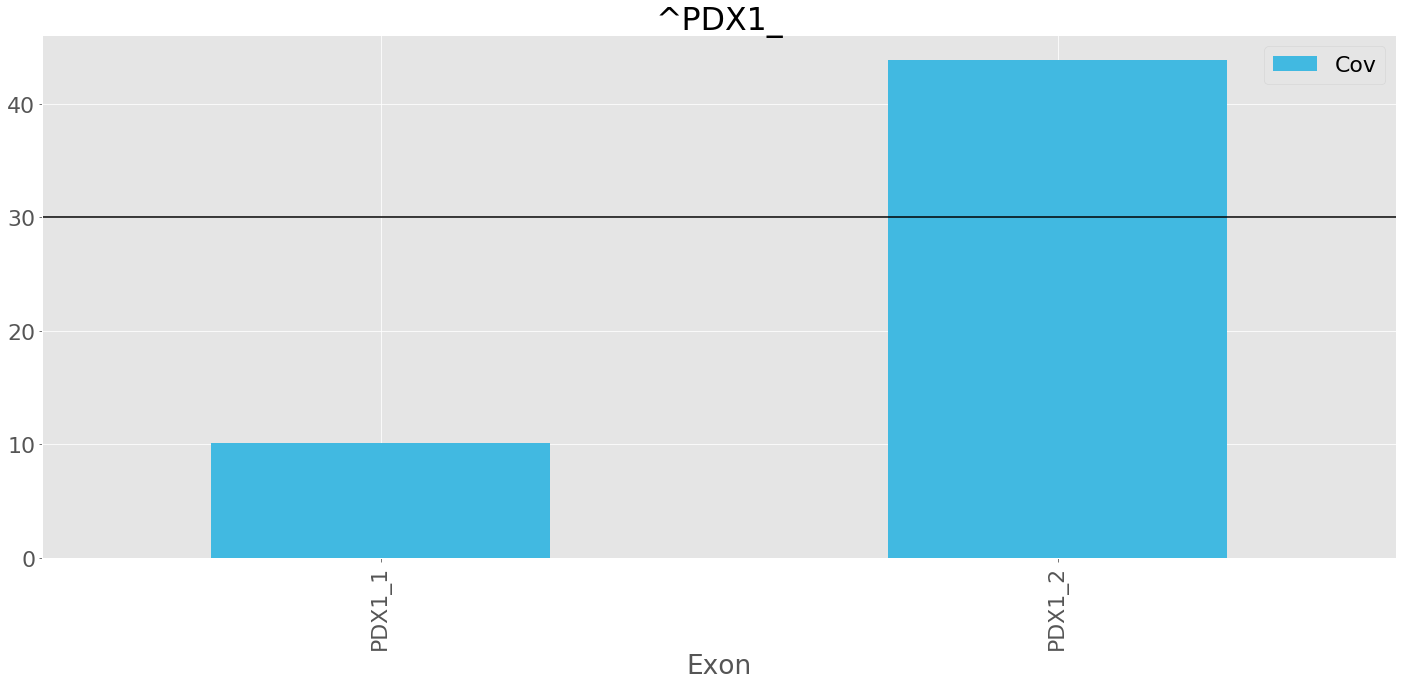

In [43]:
j = grafico_media(gen)

In [44]:
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
j.iplot(kind='bar',color = [('#41b9e1')], yTitle='Número de lecturas', xTitle='Exón')

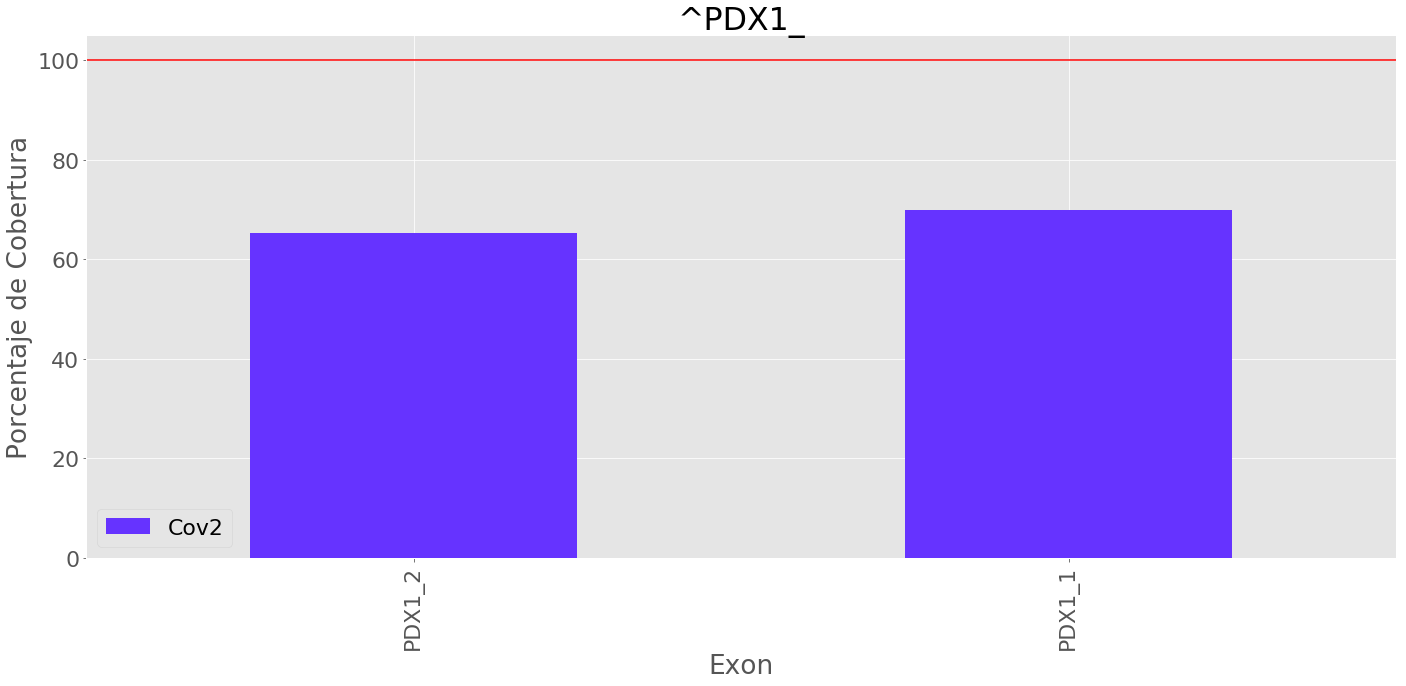

In [48]:
r = porcentaje_cobertura(gen)

In [49]:
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
r.iplot(kind='bar',color = [('#4B088A')], yTitle='Porcentaje de cobertura', xTitle='Exón')

In [50]:
print ('Nombre del exon:')

Nombre del exon:


In [54]:

exon = raw_input()

PDX1_1


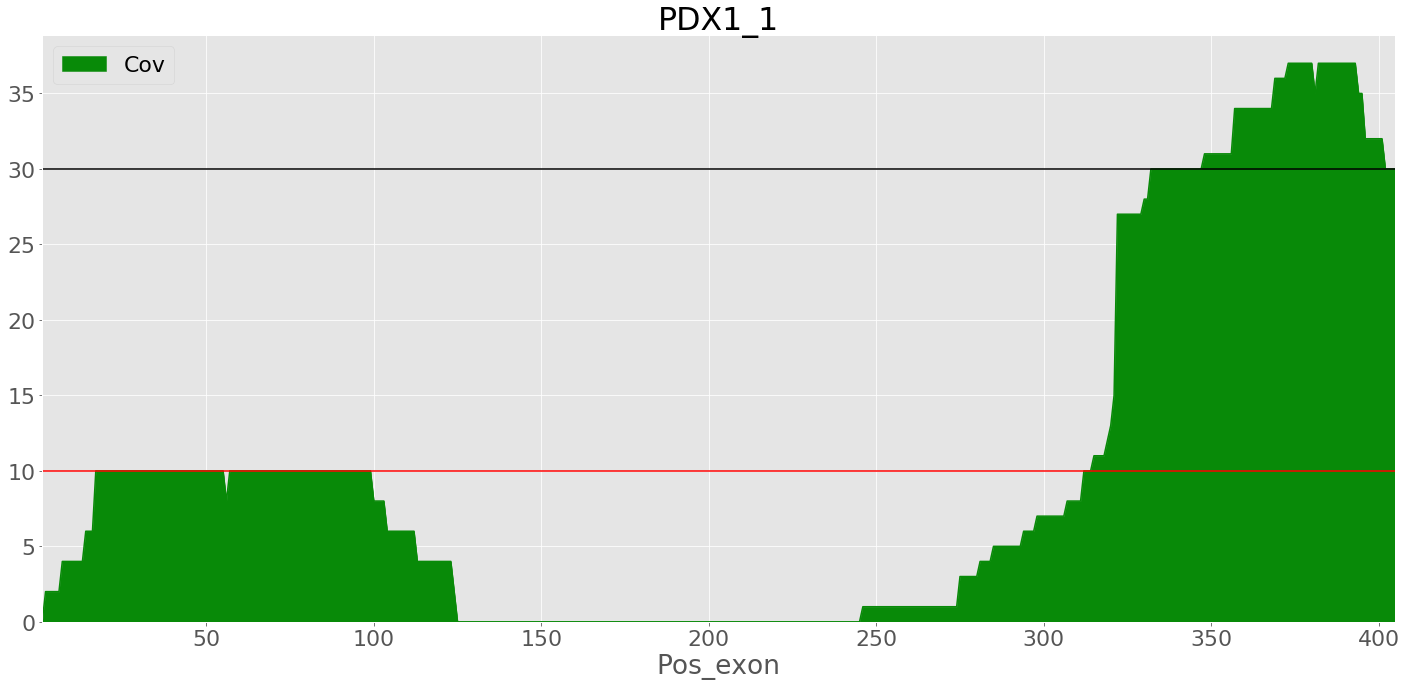

In [55]:
q = profundidad(exon)